In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

Using TensorFlow backend.


In [2]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('학습셋 이미지 수 : %d 개' %(X_train.shape[0]))
print('테스트셋 이미지 수 : %d 개' %(X_test.shape[0]))

11493376/11490434 [==============================] - 4s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


In [4]:
np.shape(X_train)

(60000, 28, 28)

In [5]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')/255

In [6]:
np.shape(X_train)

(60000, 784)

In [7]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [9]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [10]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# 모델 최적화
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [12]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, 
                    verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.15416, saving model to ./model/01-0.1542.hdf5

Epoch 00002: val_loss improved from 0.15416 to 0.10396, saving model to ./model/02-0.1040.hdf5

Epoch 00003: val_loss improved from 0.10396 to 0.08500, saving model to ./model/03-0.0850.hdf5

Epoch 00004: val_loss improved from 0.08500 to 0.07754, saving model to ./model/04-0.0775.hdf5

Epoch 00005: val_loss improved from 0.07754 to 0.06852, saving model to ./model/05-0.0685.hdf5

Epoch 00006: val_loss improved from 0.06852 to 0.06222, saving model to ./model/06-0.0622.hdf5

Epoch 00007: val_loss did not improve from 0.06222

Epoch 00008: val_loss improved from 0.06222 to 0.05880, saving model to ./model/08-0.0588.hdf5

Epoch 00009: val_loss improved from 0.05880 to 0.05814, saving model to ./model/09-0.0581.hdf5

Epoch 00010: val_loss did not improve from 0.05814

Epoch 00011: val_loss did not improve from 0.05814

Epoch 00012: val_loss did not improve from 0.05814

Epoch 00013: val_loss did n

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.evaluate(X_test, Y_test)[1]

10000/10000 [==============================] - 0s 23us/step


0.9832000136375427

In [15]:
print('\n Test Accuracy : %.4f' %(model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 0s 22us/step

 Test Accuracy : 0.9832


In [16]:
y_vloss = history.history['val_loss']
print('len(y_vloss) :', len(y_vloss))

len(y_vloss) : 19


In [17]:
y_loss = history.history['loss']
print('len(y_loss) :', len(y_loss))

len(y_loss) : 19


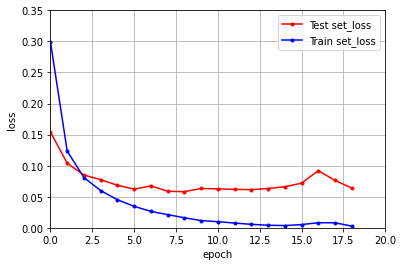

In [18]:
plt.figure(figsize=(6,4))   
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Test set_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Train set_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')  # 범례 위치 지정 후 출력 
plt.axis([0, 20, 0, 0.35])  #x축, y축 값 표현 
plt.grid()  # 그리드 출력 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()